In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from sklearn.linear_model import LogisticRegression

In [2]:
# Read product groups and train file
train = pd.read_csv("../data/train.csv")
product_groups = pd.read_csv("../data/product_groups.csv")
product_groups = product_groups.astype(object)

train

,individualnumber,category_number,hakkedis_amt,odul_amt,response
0,94230288,9000,21.0,2.0,0
1,4684087,9000,17.0,1.0,0
2,92472145,9058,24.0,3.0,0
3,88026681,9030,22.0,2.0,0
4,98127795,9001,38.0,3.0,0
...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0
13111,96841665,9004,65.0,6.0,0
13112,98445787,9044,33.0,3.0,0
13113,13781030,9004,66.0,6.0,0


In [3]:
# Check if category_level1, level2, level3, level4 -> category_number is a function (mathematical):

product_groups["hash"] = product_groups["category_level_1"].astype(str) + (product_groups["category_level_2"].astype(str)) + (product_groups["category_level_3"].astype(str)) + (product_groups["category_level_4"].astype(str))
hash_to_category_number = {}
category_number_to_hash = {}


# Keep hash as the {[first category level][second_category_level[0]]}
for index, row in product_groups[["category_number", "hash"]].iterrows():
    hash = row[1]
    if hash not in hash_to_category_number:
        hash_to_category_number[hash] = []

    if row["category_number"] not in hash_to_category_number[hash]:
        hash_to_category_number[hash].append(row["category_number"])

sum = 0
for hash in hash_to_category_number:
    if len(hash_to_category_number[hash]) > 1:
        sum += 1

for row in product_groups[["category_number", "hash"]].itertuples():
    hash = row[2]
    category_number = row[1]
    if category_number not in category_number_to_hash:
        category_number_to_hash[category_number] = []
    
    if hash not in category_number_to_hash[category_number]:
        category_number_to_hash[category_number].append(hash)
    
#for category_number in category_number_to_hash:
#    print(f"{category_number}: {category_number_to_hash[category_number]}")

for hash in hash_to_category_number:
    print(f"{hash}: {hash_to_category_number[hash]}")

341201010: [9046]
125251010: [9009]
410652010: [9049]
300101911: [9019, 9035]
305311010: [9035]
335751010: [9044]
313111010: [9056]
425451010: [9057]
616301210: [9052]
305211010: [9035]
616401510: [9055]
636411510: [9038]
660401027: [9054]
220451010: [9032]
110101010: [9001]
613351010: [9011]
628251015: [9030]
67040355: [9053]
603251010: [9000]
410507010: [9049]
335611010: [9041, 9044]
410251514: [9049]
650551035: [9044]
310401010: [9038]
220602010: [9060]
425101010: [9049]
410351010: [9049]
305101010: [9035]
646151515: [9042]
313161515: [9056]
311601010: [9037]
131301010: [9006]
300201115: [9035]
609501025: [9001]
335551035: [9044]
644301010: [9037]
617551015: [9058]
603301010: [9000]
420751510: [9052]
657601015: [9049]
340401010: [9046]
617651010: [9012]
657351111: [9049]
103251010: [9000]
200151015: [9022]
335601010: [9044]
300231010: [9035]
657151010: [9049]
125502510: [9012]
410401140: [9049]
665451011: [9057]
312101520: [9040]
425501010: [9057, 9049]
330151510: [9043]
650601010: 

RESULTS:

There are 151 hashes pointing to at least 2 different categories.

There are 010 hashes pointing to at least 3 different categories.

There are 002 hashes pointing to at least 4 different categories.


In [4]:
# Get card number - individual number match:

shopping_by_card_number = pd.read_csv("../data/transaction_header.csv")
shopping_by_card_number = shopping_by_card_number.drop(columns="date_of_transaction")
shopping_by_card_number = shopping_by_card_number.astype(object)
print(shopping_by_card_number.describe()) # Each basket id is unique 
print()

cardnumber_to_individualnumber = pd.read_csv("../data/customeraccount.csv")
#cardnumber_to_individualnumber.index = cardnumber_to_individualnumber["cardnumber"]

cardnumber_to_individualnumber = cardnumber_to_individualnumber.astype(object)
print(cardnumber_to_individualnumber.describe()) # Card number is unique,
# But some individuals have more than one cards: 28593 individuals, 35159 cards.
#cardnumber_to_individualnumber.drop(columns="cardnumber", inplace=True)
cardnumber_to_individualnumber

              cardnumber           basketid  is_sanal
count            1124673            1124673   1124673
unique             30319            1124673         2
top     9887854616568815  21071057010032641         0
freq                1239                  1   1024395

        individualnumber       cardnumber
count              35159            35159
unique             28593            35159
top             96035559  487954611568641
freq                  49                1


,individualnumber,cardnumber
0,16481068,7287134635560315
1,17634947,6587004647560415
2,19323290,8187034648564315
3,19323290,3005502487247749
4,37820213,6287114610560316
...,...,...
35154,100998656,2687784602565315
35155,101074070,6387894671560235
35156,101270229,9287054697566815
35157,101328888,2587064608564915


In [5]:
# Get basket id - individual number match

shopping_by_individual_number = pd.merge(shopping_by_card_number,cardnumber_to_individualnumber,how='inner',on='cardnumber')
shopping_by_individual_number = shopping_by_individual_number[["individualnumber", "basketid", "is_sanal"]]
shopping_by_individual_number.astype(object).describe()

basket_id_to_individual_number = shopping_by_individual_number[["basketid", "individualnumber"]].set_index("basketid")
basket_id_to_individual_number = basket_id_to_individual_number["individualnumber"].to_dict()
basket_id_to_individual_number

{20120163990041163: 68318409,
 20120436020022952: 68318409,
 20121763990012494: 68318409,
 20121810750037221: 68318409,
 20122963990049952: 68318409,
 21010263990056580: 68318409,
 21010563990057591: 68318409,
 21011663990034442: 68318409,
 21011851920010530: 68318409,
 21012210750033935: 68318409,
 21012430120049245: 68318409,
 21012563990036782: 68318409,
 21012610750034886: 68318409,
 21012710750024160: 68318409,
 21012763130024231: 68318409,
 21012863130034530: 68318409,
 21013063990017023: 68318409,
 21020263990040918: 68318409,
 21020336020030297: 68318409,
 21020363990039331: 68318409,
 21020710750016156: 68318409,
 21021063990010493: 68318409,
 21021063990025962: 68318409,
 21021436020058123: 68318409,
 21021610750030182: 68318409,
 21021636020033594: 68318409,
 21021610750030183: 68318409,
 21021963990013724: 68318409,
 21021963990034471: 68318409,
 21022063990047110: 68318409,
 21022010750031218: 68318409,
 21022330120040989: 68318409,
 21030210750033836: 68318409,
 210306639

In [6]:
# Get category_number, genel_kategori match:

genel_kategoriler = pd.read_csv("../data/genel_kategoriler.csv")
genel_kategoriler = genel_kategoriler.set_index("category_number")

category_number_to_genel_kategori = genel_kategoriler["genel_kategori"].to_dict()
category_number_to_genel_kategori

{9052: 'diger',
 9053: 'diger',
 9054: 'diger',
 9055: 'gida',
 9056: 'gida',
 9057: 'diger',
 9058: 'gida',
 9059: 'hijyen',
 9060: 'kisisel_bakim',
 9061: 'kisisel_bakim',
 9019: 'gida',
 9020: 'gida',
 9021: 'hijyen',
 9022: 'hijyen',
 9024: 'hijyen',
 9027: 'hijyen',
 9028: 'diger',
 9029: 'kisisel_bakim',
 9008: 'gida',
 9009: 'gida',
 9010: 'gida',
 9011: 'gida',
 9012: 'gida',
 9015: 'gida',
 9017: 'gida',
 9018: 'gida',
 9030: 'kisisel_bakim',
 9031: 'kisisel_bakim',
 9032: 'kisisel_bakim',
 9035: 'gida',
 9036: 'gida',
 9037: 'gida',
 9038: 'gida',
 9039: 'gida',
 9000: 'icecek',
 9001: 'gida',
 9002: 'gida',
 9003: 'gida',
 9004: 'gida',
 9005: 'gida',
 9006: 'icecek',
 9007: 'gida',
 9040: 'gida',
 9041: 'gida',
 9042: 'gida',
 9043: 'gida',
 9044: 'gida',
 9046: 'gida',
 9048: 'diger',
 9049: 'diger'}

In [7]:
transaction_sale = pd.read_csv("../data/transaction_sale/transaction_sale.csv")
transaction_sale["discount_type_1"].fillna(0, inplace=True)
transaction_sale

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3
0,20120706070177471,613,50,50,15,19.90,2.0,0.0,0.0,0.00
1,20120706070177471,425,30,12,10,3.50,1.0,0.0,0.0,0.00
2,20120706070177471,425,30,12,11,7.90,1.0,0.0,0.0,0.00
3,20122703940031323,103,25,15,10,7.90,2.0,0.0,0.0,0.00
4,20122703940031323,101,15,15,15,16.00,1.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
6537876,20120839080026509,103,35,10,10,2.95,1.0,0.0,0.0,0.00
6537877,20120839080026509,130,85,11,10,3.40,1.0,0.0,0.0,0.00
6537878,20120839080026509,131,10,10,20,4.45,1.0,0.0,0.0,0.00
6537879,21101831040099839,103,35,10,10,0.01,1.0,0.0,0.0,1.24


* Implemented three methods for storing the shopping history of a customer.
* Discount types are not taken into consideration.

### Store Type 1: _Store each buy seperately_

In this format data is stored in the following way:

    {
        "individual_number_1": [
            {"category_1": 130, "category_2": 45, "category_3": 10, "category_4": 20, "amount": 19.90, "quantity": 1.000}
            {"category_1": 150, "category_2": 15, "category_3": 15, "category_4": 25, "amount": 3.50, "quantity": 1.430}
        ]
        "individual_number_2": [
            {"category_1": 617, "category_2": 25, "category_3": 15, "category_4": 10, "amount": 8.75, "quantity": 2.000}
        ]
    }

### Store Type 2: _Store by total volume of the buy, classify them according to category level 1 and category level 2_

In this format data is stored in the following way:

    {
        "individual_number_1": {

            613: {
                50: [3.0, 49.75], 
                40: [11.0, 248.65], 
                15: [2.0, 8.9]
            }, 

            425: {
                30: [2.0, 11.4]
            }, 
            
            130: {
                85: [10.0, 165.06]
            }
        }
    }

* First key represents the category level 1.
* Second key represents the category level 2.
* Inner list stores the quantity and total money spent on that combination of category_1, category_2:
* [quantity, total_amount]

### Store Type 3: _Store by total volume of the buy, classify them according to category number used in campaigns_

In this format data is stored in the following way:

    {
        "individual_number_1": {

            9049: [47.89, 3054.63],
            9013: [xx.xx, xxxx.xx],
            ...
            "unknown": [xxx.xx, xxxxx.xx]
        }
        
        "individual_number_2": {

            9049: [16.23, 2045.82],
            9013: [xx.xx, xxxx.xx],
            ...
            "unknown": [xxx.xx, xxxxx.xx]
        }        
    }

* Category level's are converted to category number used in campaigns by using category_level_1 and category_level_2.
* This method may further change.

In [8]:
# To be fixed:
    # Round quantity and total price data

# Store type 1: ~90s to execute.
# Store type 2: ~25s to execute.
# Store type 3: ~30s to execute.

# Select store type: 1 or 2 or 3: (0 for to see individual_shopping_volume only)
store_type = 3

individual_shopping_information = {}
individual_shopping_volume = {} # Simple dictionary: {"individual_number": total_money_spent}
individual_to_total_discount = {} # Simple dictionary: {"individual_number": total_discount}

# Read the transaction_sale file and save each customer's shopping history in the "individual_shopping_information" dictionary.
for row in transaction_sale.itertuples(): 
    # Get necessary features:

    basket_id = row[1]
    category_1 = row[2]
    category_2 = row[3]
    category_3 = row[4]
    category_4 = row[5]
    amount = row[6]
    quantity = row[7]
    discount_1 = row[8]
    discount_2 = row[9]
    discount_3 = row[10]
    
    # Get total discount in terms of tl:
    total_discount_value = amount * quantity * (1 - (1 - (discount_1 / 100)) * (1 - (discount_2 / 100)) * (1 - (discount_3 / 100)))
    # Get individual number:
    individual_number = basket_id_to_individual_number[basket_id]
    
    if individual_number not in individual_shopping_volume:
        individual_shopping_volume[individual_number] = 0
    individual_shopping_volume[individual_number] += quantity * amount

    if store_type == 1:
        # Storing method: type1 -> Store the products seperately.
        # Initialize customer shopping information if customer is not in information_shopping_information:
        if individual_number not in individual_shopping_information:
            individual_shopping_information[individual_number] = []
            
        product_information = {}
        product_information["category_level_1"] = category_1
        product_information["category_level_2"] = category_2
        product_information["category_level_3"] = category_3
        product_information["category_level_4"] = category_4
        product_information["amount"] = amount
        product_information["quantity"] = quantity

        individual_shopping_information[individual_number].append(product_information)
    
    elif store_type == 2:
        # Storing method: type2 -> Store the products by keys as category_1 and category_2, values = volume of the buy history.
        # Initialize customer shopping information if customer is not in individual_shopping_information:        
        if individual_number not in individual_shopping_information:
            individual_shopping_information[individual_number] = {}
        
        # Initialize category_1 in customer's shopping history if category_1 is not in customer's shopping history:
        if category_1 not in individual_shopping_information[individual_number]:
            individual_shopping_information[individual_number][category_1] = {}

        # Initialize category_1 in customer's category_1 shopping history if category_2 is not in customer's category_1 shopping history:
        if category_2 not in individual_shopping_information[individual_number][category_1]:
             # 0th index will be quantity, 1st index will be total money spent on that category combination.
            individual_shopping_information[individual_number][category_1][category_2] = [0, 0]
        
        # Increment the total volume in customer's shopping history branch: category_1, branch: category_2:
        individual_shopping_information[individual_number][category_1][category_2][0] += quantity
        individual_shopping_information[individual_number][category_1][category_2][1] += quantity * amount

    elif store_type == 3:
        # Storing method: type3 -> Store the products' volume by category_number used in campaign.
        # To match a product's category level to category type used in campaign, use the hash= {category_level_1 + category_level_2}
        # Initialize customer shopping information if customer is not in individual_shopping_information:
        if individual_number not in individual_shopping_information:
            individual_shopping_information[individual_number] = {}
            individual_to_total_discount[individual_number] = 0
        
        category_hash = str(category_1) + str(category_2) + str(category_3) + str(category_4)
        try:
            category_number_list = hash_to_category_number[category_hash]
        except:
            category_number_list = ["unknown"]

        # Initialize category_number in customer's shopping history if category_number is not in customer's shopping history:
        for category_number in category_number_list:
            if category_number not in individual_shopping_information[individual_number]:
                # 0th index will be quantity, 1st index will be total money spent on that category number.
                individual_shopping_information[individual_number][category_number] = [0, 0]
            
            individual_shopping_information[individual_number][category_number][0] += quantity
            individual_shopping_information[individual_number][category_number][1] += quantity * amount

        individual_to_total_discount[individual_number] += total_discount_value
        # Add total discount earned by customer:

In [9]:
individual_to_total_discount

{90065509: 3274.7931359070712,
 56076820: 368.5615558013625,
 37752547: 749.0056087119443,
 98384331: 156.81986585068393,
 94255308: 110.13502929323064,
 93937111: 3401.73919138503,
 94688545: 97.06568871123869,
 91747483: 3073.1180135719073,
 94778614: 5237.759673644285,
 16893075: 178.90372790320328,
 94616834: 1236.2196031971614,
 94697868: 19.89641185390461,
 74174356: 29.599544407201932,
 96249709: 2808.797908318407,
 73870110: 462.5249998909595,
 16472172: 1903.1842861732866,
 88801604: 10513.535668392464,
 93449464: 1514.3134671574367,
 92876940: 14079.69040122394,
 89216880: 429.31949906660697,
 93350998: 858.573211572,
 96787839: 832.8973876418496,
 95993648: 303.18105248021925,
 25235949: 371.4136164711623,
 93862335: 31.923026943575,
 57167031: 19.994308965,
 93318609: 839.6616735017753,
 98243967: 15.27853863687,
 74945395: 584.0883996449508,
 68952827: 13.912196999999999,
 93045592: 2035.4002561721813,
 97109866: 308.2178427302997,
 93522155: 250.2897986380822,
 97690886: 

In [10]:
# Prepare individual shopping volume and individual total discount data:
individual_shopping_volume_df = pd.DataFrame()
individual_shopping_volume_df["individualnumber"] = individual_shopping_volume.keys()
individual_shopping_volume_df["total_money_spent"] = individual_shopping_volume.values()

individual_total_discount_df = pd.DataFrame()
individual_total_discount_df["individualnumber"] = individual_to_total_discount.keys()
individual_total_discount_df["total_discount"] = individual_to_total_discount.values()

individual_total_discount_df


,individualnumber,total_discount
0,90065509,3274.793136
1,56076820,368.561556
2,37752547,749.005609
3,98384331,156.819866
4,94255308,110.135029
...,...,...
28571,95633120,0.043725
28572,101593888,23.101875
28573,100444534,0.000000
28574,22325553,0.720000


In [11]:
# Prepare the data frame to explore the correlation between shopping history of an individual and their response.

# To initialize the data, merge train data with individual shopping volume (total money spent)
response_by_shopping_history = pd.merge(train, individual_shopping_volume_df, how="inner", on="individualnumber")
response_by_shopping_history = pd.merge(response_by_shopping_history, individual_total_discount_df, how="inner", on="individualnumber")


# relevant_category = The category number of the campaing that has been proposed to individual.

# Includes total money spent by a customer in relevant_category:
relevant_category_volume_column = []
# Includes percentage of relevant_category expenses of a customer,
# (relevant_category expense / total expense):
relevant_category_percent_without_unknown_column = []
# Includes percentage of relevant_category expenses of a customer excluding unknown category expenses,
# (relevant_category expense / (total expense - unknown expense)):
relevant_category_percent_column = []
# Includes total quantity of items in relevant_category that is bought by customer:
relevant_category_quantity_column = []

# Iterate over individuals to add more features into the data frame.
for row in response_by_shopping_history.itertuples():
    individual_number = row[1]
    category_number = row[2]
    total_money_spent = row[6]

    # Get relevant category expense from the data
    try:
        relevant_money_spent = individual_shopping_information[individual_number][category_number][1]
        relevant_quantity = individual_shopping_information[individual_number][category_number][0]
    except:
        relevant_money_spent = 0
        relevant_quantity = 0
    
    # Get unknown expense from the data
    try:
        unknown = individual_shopping_information[individual_number]["unknown"][1]
    except:
        unknown = 0
    
    # Try to find (relevant_category expense / (total expense - unknown expense)), if total expense = unknown expense, set percentage = 0:
    try:
        relevant_category_percent_without_unknown_column.append(round(relevant_money_spent / (total_money_spent - unknown), 3))
    except:
        relevant_category_percent_without_unknown_column.append(0) 
   
    # Append columns by relevant information:
    relevant_category_volume_column.append(round(relevant_money_spent, 3))
    relevant_category_percent_column.append(round(relevant_money_spent / total_money_spent, 3))
    relevant_category_quantity_column.append(round(relevant_quantity, 3))

# Finalize columns in the original data frame:
response_by_shopping_history["relevant_category_volume"] = relevant_category_volume_column
response_by_shopping_history["relevant_category_quantity"] = relevant_category_quantity_column
response_by_shopping_history["relevant_category_percent"] = relevant_category_percent_column
response_by_shopping_history["relevant_category_percent_without_unknown"] = relevant_category_percent_without_unknown_column

response_by_shopping_history

,individualnumber,category_number,hakkedis_amt,odul_amt,response,total_money_spent,total_discount,relevant_category_volume,relevant_category_quantity,relevant_category_percent,relevant_category_percent_without_unknown
0,94230288,9000,21.0,2.0,0,7118.94741,177.489978,241.110,36.000,0.034,0.045
1,4684087,9000,17.0,1.0,0,10192.64563,31907.260487,105.900,12.000,0.010,0.016
2,92472145,9058,24.0,3.0,0,35113.80415,10060.118391,120.850,11.000,0.003,0.005
3,88026681,9030,22.0,2.0,0,11559.66676,231.976316,138.650,8.000,0.012,0.014
4,98127795,9001,38.0,3.0,0,461.77380,1.738800,38.000,2.000,0.082,0.114
...,...,...,...,...,...,...,...,...,...,...,...
13106,97214433,9059,27.0,2.0,0,16893.83688,1598.015176,58.960,5.000,0.003,0.008
13107,96841665,9004,65.0,6.0,0,13089.84113,500.344604,250.750,5.000,0.019,0.045
13108,98445787,9044,33.0,3.0,0,2432.60788,244.758629,27.656,0.832,0.011,0.012
13109,13781030,9004,66.0,6.0,0,1242.70635,6.080452,68.500,1.000,0.055,0.125


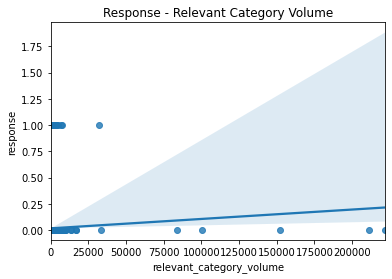

9332.595760000568

In [12]:
# Visualize response by relevant_category_volume to see outliers before visualizing correlation.

data = response_by_shopping_history[["response", "relevant_category_volume"]]

x = data.relevant_category_volume.to_numpy()
y = data.response.to_numpy()

sns.regplot(data=data, x="relevant_category_volume", y="response")
plt.title("Response - Relevant Category Volume")
plt.show()

upper_limit = data["relevant_category_volume"].quantile(0.999)
upper_limit

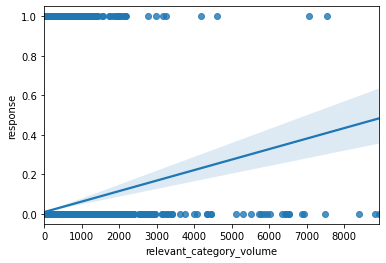

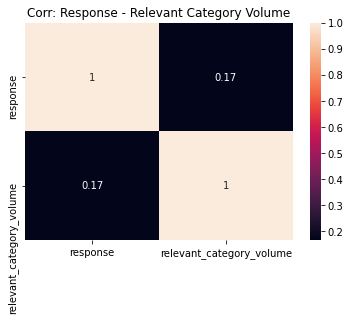

In [13]:
# Visualize correlation heat map for response and relevant_category_volume

mark_1 = (data["relevant_category_volume"] <= upper_limit)
data_marked = data[mark_1]

correlation = data_marked.corr()

# sns.boxplot(data=data, y="relevant_category_volume", x="response")
sns.regplot(data=data_marked, x="relevant_category_volume", y="response")
plt.show()

sns.heatmap(correlation, annot=True)
plt.title("Corr: Response - Relevant Category Volume")
plt.show()

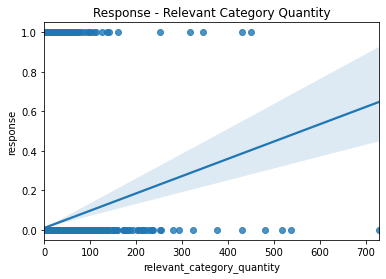

532.072824999969

In [14]:
# Visualize response by relevant_category_quantity to see outliers before visualizing correlation.

data = response_by_shopping_history[["response", "relevant_category_quantity"]]

x = data.relevant_category_quantity.to_numpy()
y = data.response.to_numpy()

sns.regplot(data=data, x="relevant_category_quantity", y="response")
plt.title("Response - Relevant Category Quantity")
plt.show()

upper_limit = data["relevant_category_quantity"].quantile(0.9999)
upper_limit

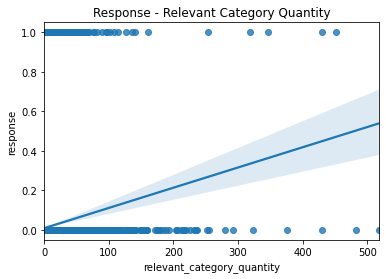

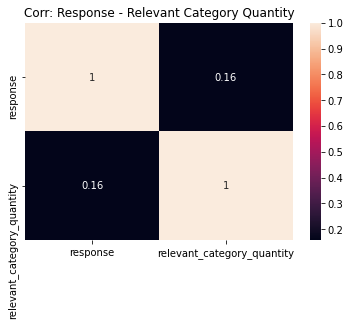

In [15]:
# Visualize correlation heat map for response and relevant_category_quantity

mark_2 = data["relevant_category_quantity"] <= upper_limit
data_marked = data[mark_2]

sns.regplot(data=data_marked, x="relevant_category_quantity", y="response")
plt.title("Response - Relevant Category Quantity")
plt.show()

correlation = data_marked.corr()
sns.heatmap(correlation, annot=True)
# sns.boxplot(data=data_marked, y="relevant_category_quantity", x = "response")
plt.title("Corr: Response - Relevant Category Quantity")
plt.show()

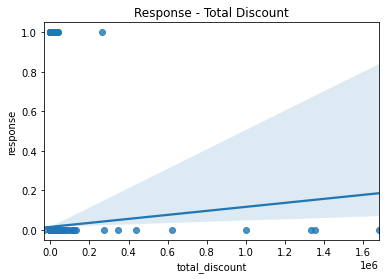

96467.75422058853

In [16]:
# Visualize response by total_discount to see outliers before visualizing correlation.
data = response_by_shopping_history[["response", "total_discount"]]

x = data.total_discount.to_numpy()
y = data.response.to_numpy()

sns.regplot(data=data, x="total_discount", y="response")
plt.title("Response - Total Discount")
plt.show()

upper_limit = data["total_discount"].quantile(0.999)
upper_limit

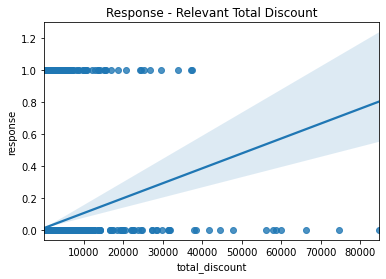

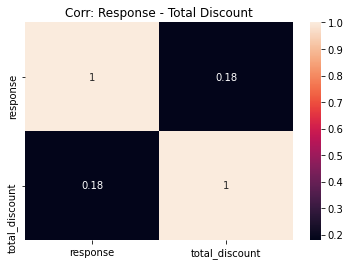

In [17]:
# Visualize correlation heat map for response and total_discount

mark_3 = (data["total_discount"] <= upper_limit) & (data["total_discount"] > 0)
data_marked = data[mark_3]

sns.regplot(data=data_marked, x="total_discount", y="response")
plt.title("Response - Relevant Total Discount")
plt.show()

correlation = data_marked.corr()
sns.heatmap(correlation, annot=True)
# sns.boxplot(data=data_marked, y="total_discount", x = "response")
plt.title("Corr: Response - Total Discount")
plt.show()

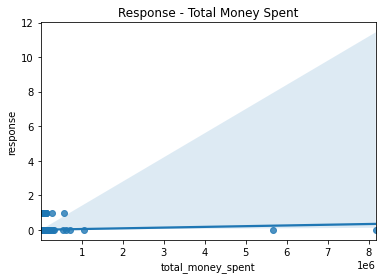

4223674.215903368

In [18]:
# Visualize response by total_money_spent to see outliers before visualizing correlation.
data = response_by_shopping_history[["response", "total_money_spent"]]

x = data.total_money_spent.to_numpy()
y = data.response.to_numpy()

sns.regplot(data=data, x="total_money_spent", y="response")
plt.title("Response - Total Money Spent")
plt.show()

upper_limit = data["total_money_spent"].quantile(0.9999)
upper_limit

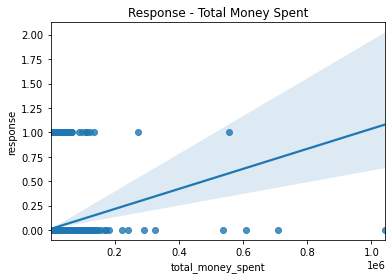

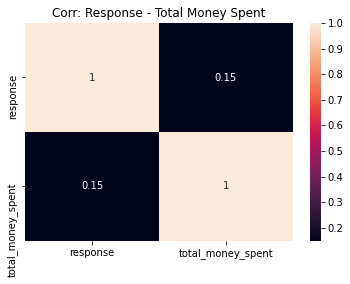

In [19]:
# Visualize correlation heat map for response and total_money_spent

mark_4 = data["total_money_spent"] <= upper_limit
data_marked = data[mark_4]

sns.regplot(data=data_marked, x="total_money_spent", y="response")
plt.title("Response - Total Money Spent")
plt.show()

correlation = data_marked.corr()
sns.heatmap(correlation, annot=True)
# sns.boxplot(data=data_marked, y="total_money_spent", x = "response")
plt.title("Corr: Response - Total Money Spent")
plt.show()

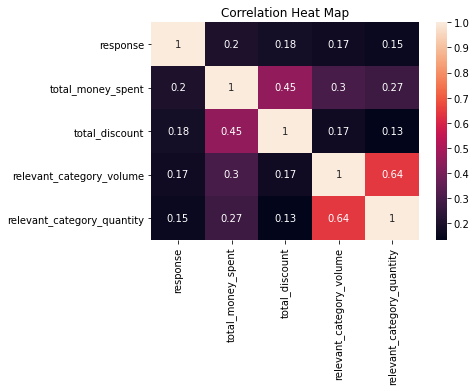

In [20]:
# Visualize correlation between all shopping related features:
data = response_by_shopping_history[["response", "total_money_spent", "total_discount", "relevant_category_volume", "relevant_category_quantity"]]
mark = mark_1 & mark_2 & mark_3 & mark_4
correlation = data[mark].corr()

sns.heatmap(correlation, annot=True)
plt.title("Correlation Heat Map")
plt.show()


In [28]:
train = pd.read_csv('../data/train.csv', index_col='individualnumber')
train

,category_number,hakkedis_amt,odul_amt,response
individualnumber,,,,
94230288,9000,21.0,2.0,0
4684087,9000,17.0,1.0,0
92472145,9058,24.0,3.0,0
88026681,9030,22.0,2.0,0
98127795,9001,38.0,3.0,0
...,...,...,...,...
97214433,9059,27.0,2.0,0
96841665,9004,65.0,6.0,0
98445787,9044,33.0,3.0,0


In [29]:
categories = np.sort(train.category_number.unique())

response = {k:0 for k in categories}
quantity = {k:0 for k in categories}
volume = {k:0 for k in categories}

for user in train.itertuples():
    try:
        user_data = individual_shopping_information[user.Index]
    except:
        pass
    for c in categories:
        try:
            if user.category_number == c:
                response[c] += user.response
            quantity[c] += user_data[c][0]
            volume[c] += user_data[c][1]
        except:
            pass

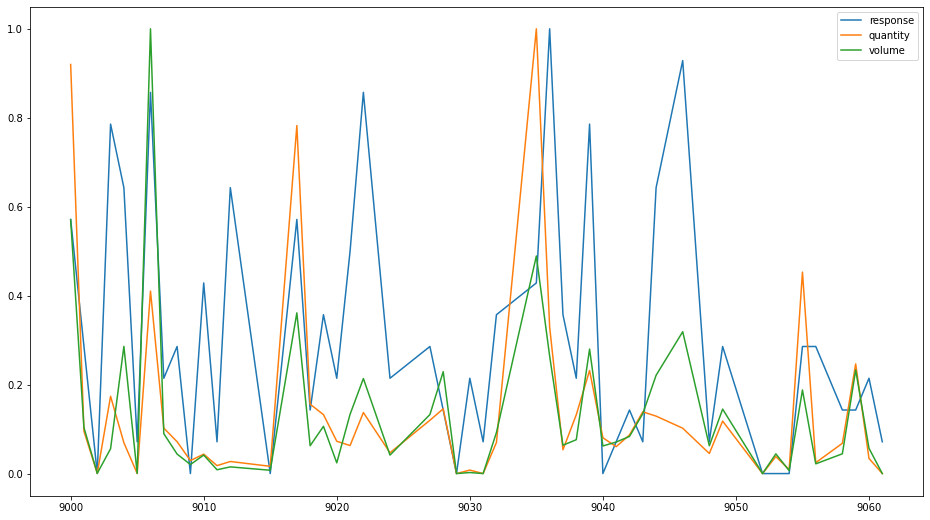

In [35]:
r = np.array([response[c] for c in categories])
quat = np.array([quantity[c] for c in categories])
vol = np.array([volume[c] for c in categories])
plt.figure(figsize=(16,9),dpi=72)
plt.plot(categories, r/max(r),label='response')
plt.plot(categories, quat/max(quat),label='quantity')
plt.plot(categories, vol/max(vol),label='volume')
plt.legend()

In [31]:
relative_quantity_per_user = {k:0 for k in train.index.to_numpy()}
relative_volume_per_user = {k:0 for k in train.index.to_numpy()}
relative_response_per_user = {k:0 for k in train.index.to_numpy()}
categories_relative_quantity = {k:relative_quantity_per_user for k in np.sort(train.category_number.unique())}
categories_relative_volume = {k:relative_volume_per_user for k in np.sort(train.category_number.unique())}
relative_response = {k:relative_response_per_user for k in np.sort(train.category_number.unique())}
for user in train.itertuples():
    try:
        user_data = individual_shopping_information[user.Index]
        category_given = user.category_number
        categories_relative_quantity[category_given][user.Index] += user_data[category_given][0]
        categories_relative_volume[category_given][user.Index] += user_data[category_given][1]
        relative_response[category_given][user.Index] += user.response
    except:
        pass

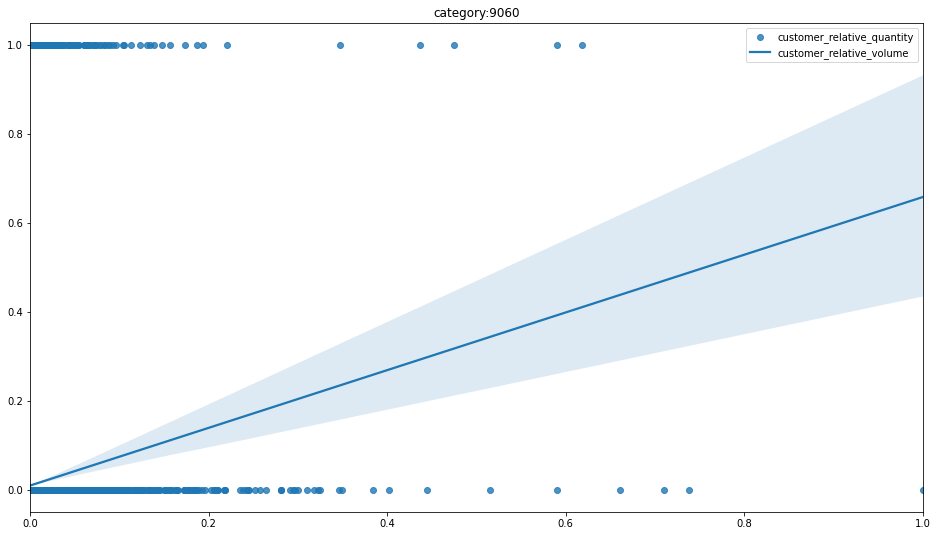

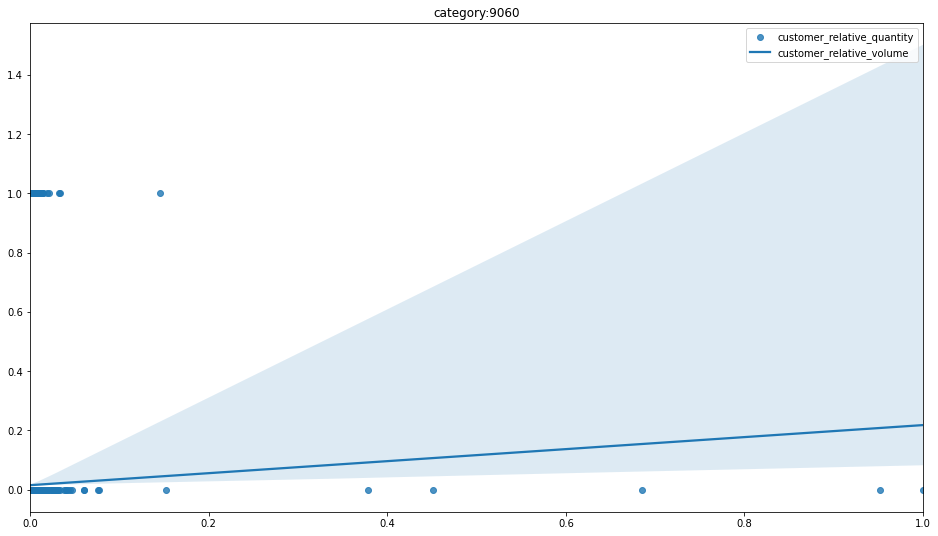

In [38]:
c_num = 9060
customers = categories_relative_quantity[c_num].keys()
customer_relative_quantity = np.array([categories_relative_quantity[c_num][q] for q in customers])
customer_relative_quantity = customer_relative_quantity/max(customer_relative_quantity)
customer_relative_volume = np.array([categories_relative_volume[c_num][q] for q in customers])
customer_relative_volume = customer_relative_volume/max(customer_relative_volume)
r = [relative_response[c_num][q] for q in customers]
plt.figure(figsize=(16,9),dpi=72)
sns.regplot(customer_relative_quantity, r)
plt.title('category:{}'.format(c_num))
plt.legend(labels=['customer_relative_quantity','customer_relative_volume'])
plt.figure(figsize=(16,9),dpi=72)
sns.regplot(customer_relative_volume, r)
plt.title('category:{}'.format(c_num))
plt.legend(labels=['customer_relative_quantity','customer_relative_volume'])
plt.show()